In [17]:
import pandas as pd
test = pd.read_csv('resources/challenge1_test.csv', index_col='id')
test_names = test.label.unique()
print(test_names)

['JORDAN_235_P1_201901281204_MGA94_55'
 'JORDAN_294_P1_201902011150_MGA94_55'
 'WALHALLA_313_P1_201902020733_MGA94_55'
 'WALHALLA_353_P1_201902031625_MGA94_55'
 'MACALISTER91_648_P1_201903070444_MGA94_55']


JORDAN_235_P1_201901281204_MGA94_55
JORDAN_294_P1_201902011150_MGA94_55
WALHALLA_313_P1_201902020733_MGA94_55
WALHALLA_353_P1_201902031625_MGA94_55
MACALISTER91_648_P1_201903070444_MGA94_55


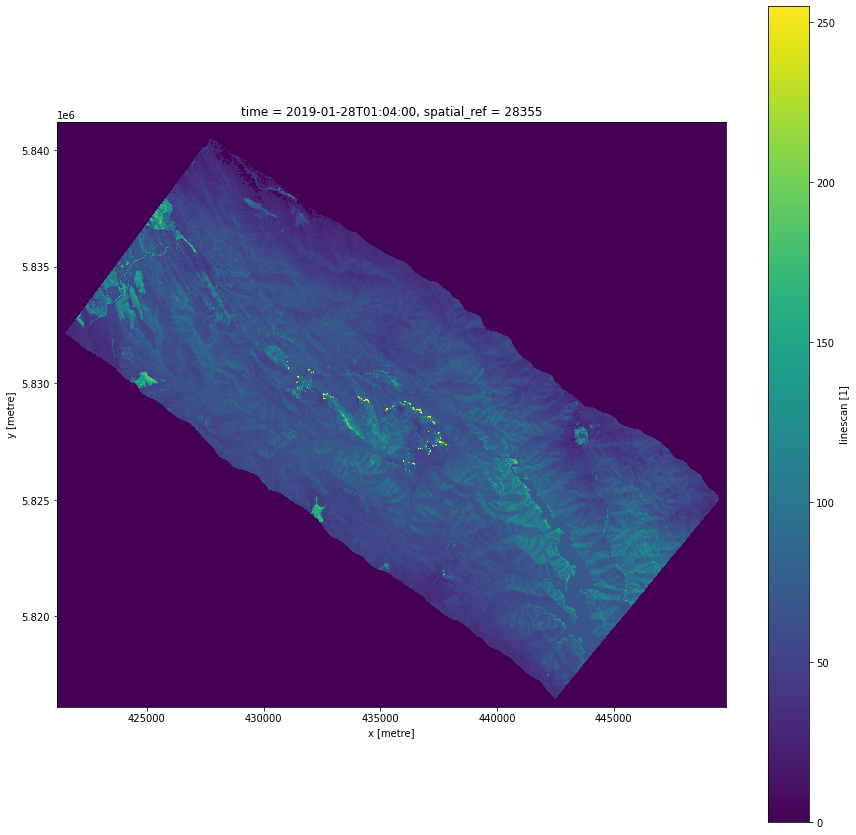

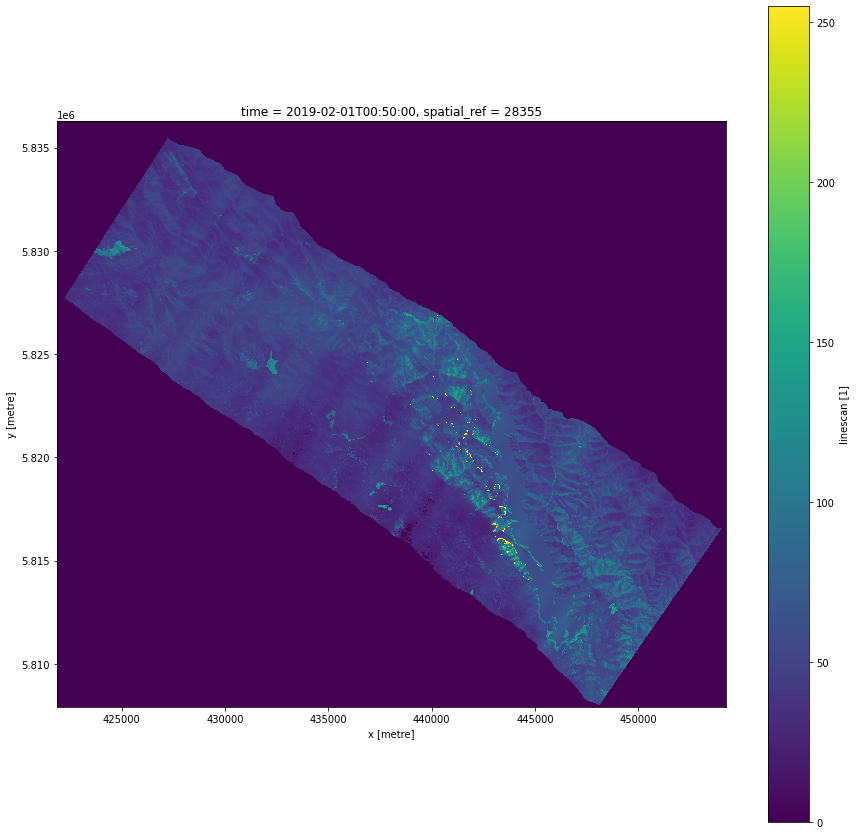

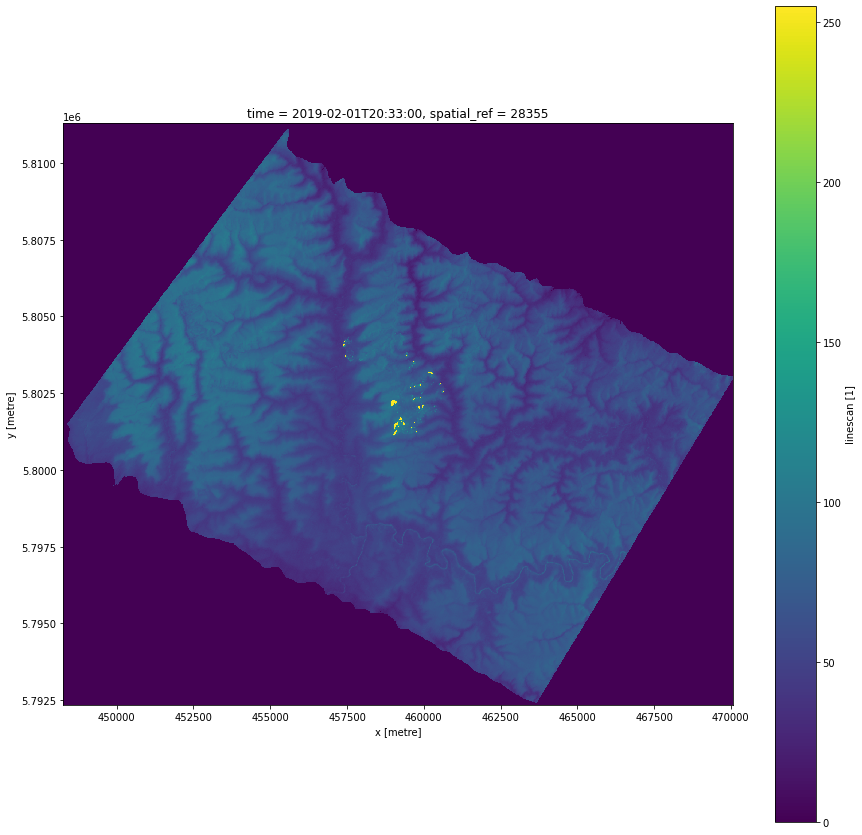

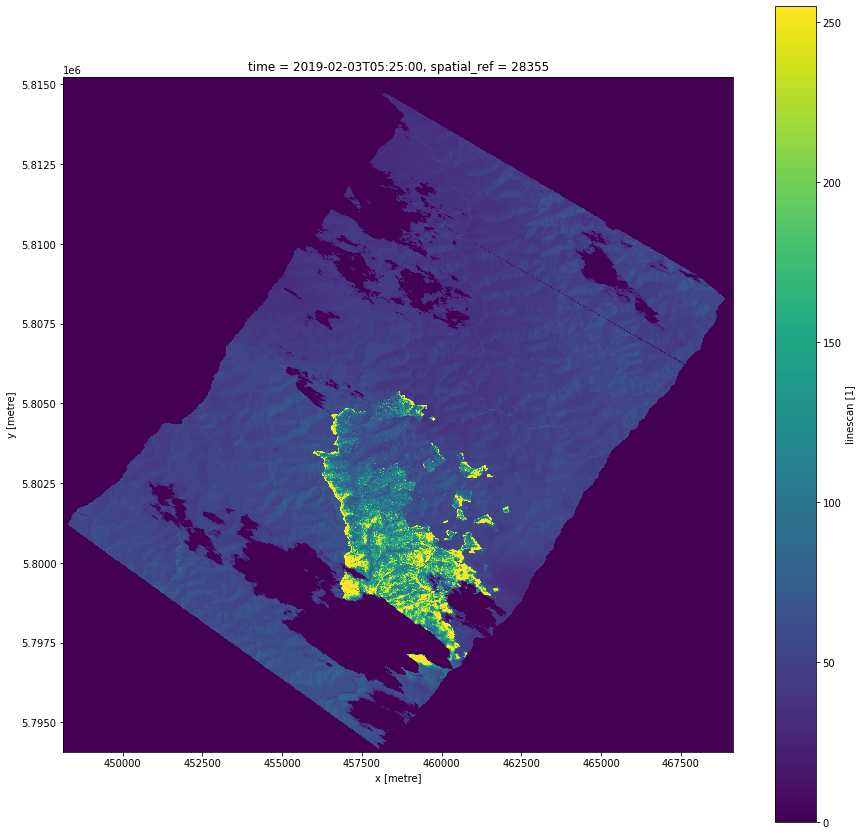

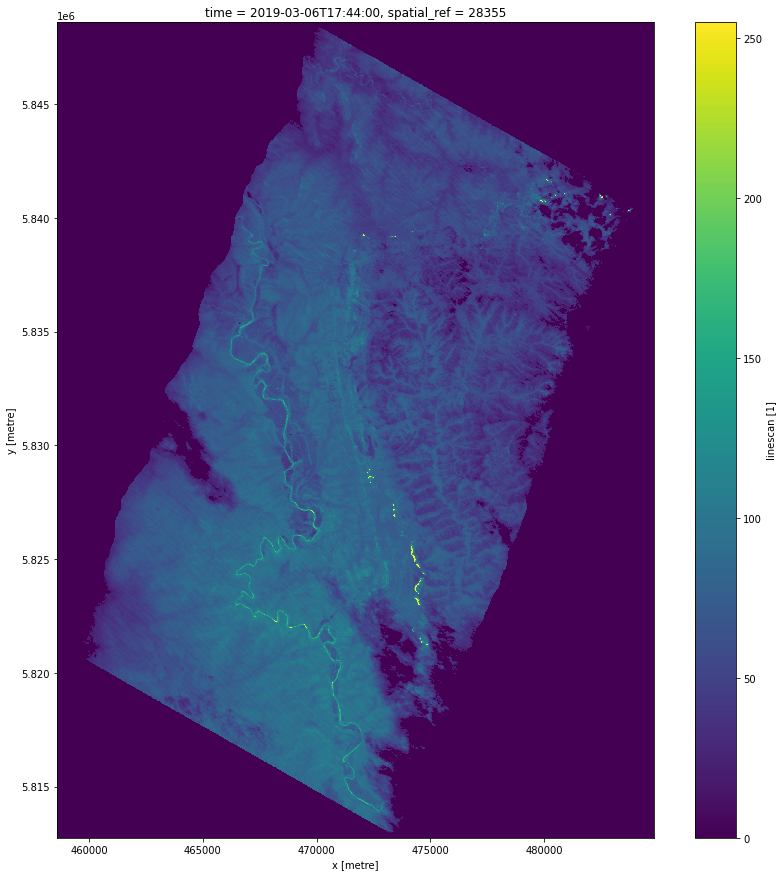

In [18]:
from datacube import Datacube
import geopandas as gpd
import matplotlib.pyplot as plt

dc = Datacube(app="Getting started")
linescan_datasets = dc.find_datasets(product='linescan')
linescan_datasets = sorted(linescan_datasets, key = lambda ds: (ds.center_time, ds.id))

vector_file = 'resources/fire_boundaries.shp'
gdf = gpd.read_file(vector_file)

def clean_name(name):
    if name is None:
        res = None
    else:
        if name.upper()[-4::] == ".JPG":
            res = name.upper()[:-4].replace(' ','_')
        else:
            res = name.upper().replace(' ','_')
    return res
gdf['SourceNameClean'] = gdf.apply(lambda row: clean_name(row.SourceName), axis=1)

for i in range(129):
    fname = linescan_datasets[i].metadata_doc['label']
    if fname in test_names:
        ob = gdf.loc[gdf.SourceNameClean == fname]
        src = dc.load(product='linescan', id=linescan_datasets[i].id, output_crs='epsg:28355', resolution=(-10,10))
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
        src.linescan.plot(ax=ax)
        ob.geometry.exterior.plot(ax=ax, edgecolor='red', linewidths=1)
        print(fname)
    
